# Homework 0: Introduction to PyTorch and Neural Networks

In this homework, you will implement a binary classifier to distinguish between T-shirts and sneakers from the Fashion-MNIST dataset. You'll build this classifier twice: once from scratch using basic PyTorch operations, and once using PyTorch's neural network modules. This process will help you understand both the fundamental mathematics behind neural networks and the practical tools provided by PyTorch.

Please:
* Fill out the code marked with `TODO` or `Your code here`.
* Run your code and provided support functions following the instructions.
* Submit the notebook with all original outputs. If you run code on TACC and does not support running jupyter notebook, you can save the result images and manually input them into the notebook.
* Answer questions at the end of the notebook. Write your answere in the notebook.

## Part 1: Setup and Data Loading

This section introduces you to PyTorch's data handling capabilities. We'll use the Fashion-MNIST dataset, a modern replacement for MNIST that contains images of clothing items. You'll learn how to:

* Load and preprocess image data
* Create data loaders for efficient batch processing
* Visualize sample images from the dataset
* Filter a dataset to create a binary classification problem

Please fill out the code marked with `TODO` and use the provided visualization function to visualize two sets of data.

In [3]:
# The following imports are all you need for this assignment.
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_binary_fashion_mnist(batch_size=64):
    # Define transforms
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    # Load full dataset, will automatically download to a 'data' subfolder.
    trainset = torchvision.datasets.FashionMNIST('./data', train=True,
                                                download=True, transform=transform)
    testset = torchvision.datasets.FashionMNIST('./data', train=False,
                                               download=True, transform=transform)
    
    # Filter dataset to keep only T-shirts (label 0) and Sneakers (label 9)
    train_idx = np.where((np.array(trainset.targets) == 0) | (np.array(trainset.targets) == 9))[0]
    test_idx = np.where((np.array(testset.targets) == 0) | (np.array(testset.targets) == 9))[0]
    
    # Create data loaders
    # TODO: Create two dataloader based on trainset, train_idx, and test_set, test_idx.
    # Your code here
    train_subset = torch.utils.data.Subset(trainset, train_idx)
    test_subset = torch.utils.data.Subset(testset, test_idx)
    
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False)
    
    return trainloader, testloader

/tmp/ipykernel_3440/2862402295.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_idx = np.where((np.array(trainset.targets) == 0) | (np.array(trainset.targets) == 9))[0]
/tmp/ipykernel_3440/2862402295.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_idx = np.where((np.array(testset.targets) == 0) | (np.array(testset.targets) == 9))[0]


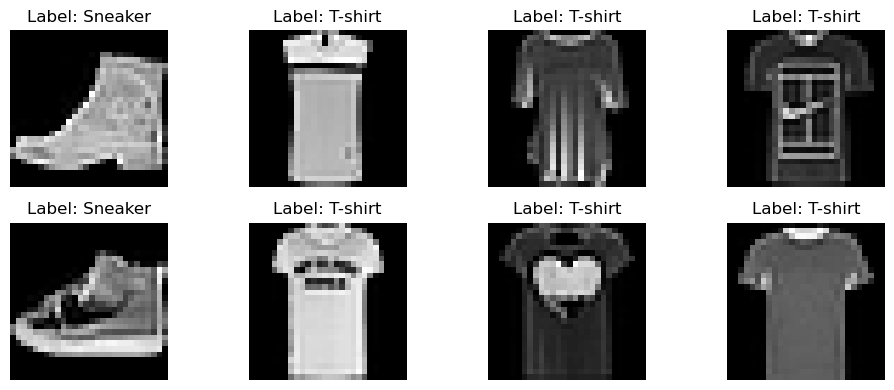

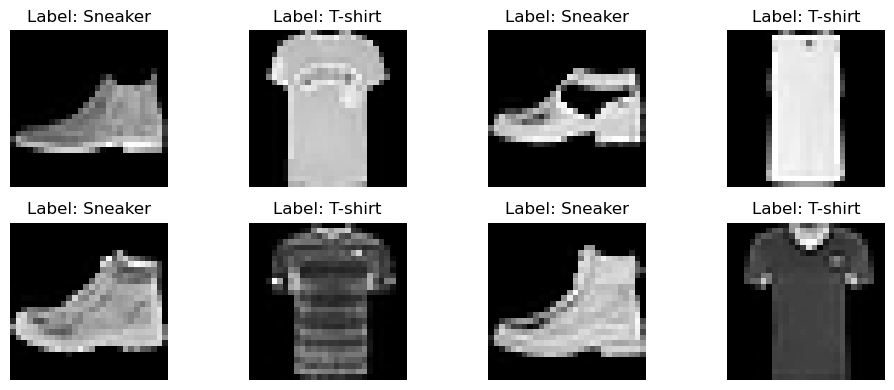

In [5]:
# Visualization function
def show_samples(dataloader):
    images, labels = next(iter(dataloader))
    plt.figure(figsize=(10, 4))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Label: {"Sneaker" if labels[i]==9 else "T-shirt"}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    

trainloader, testloader = load_binary_fashion_mnist(batch_size=64)
show_samples(trainloader)
show_samples(testloader)

## Part 2: Building a Neural Network from Scratch

Before using PyTorch's high-level tools, we'll implement a neural network using only basic tensor operations. This "from scratch" implementation will help you understand:

* How neural network layers are constructed with weights and biases
* How data flows through the network (forward pass)
* How automatic differentiation works in PyTorch

You will implement a 3-layer Multi-Layer Perceptron (MLP) from scratch. Our network architecture transforms a flattened 28×28 pixel image (784 dimensions) into a single probability value indicating whether the image is a sneaker (1) or a t-shirt (0). Here's the detailed structure with size information:

```
Input (784) -> Linear (512) -> ReLU -> Linear (128) -> ReLU -> Linear (1) -> Sigmoid -> Output (1)
```

For each components:

* Linear Layer: output = input $\times$ W + b, where weights (W) should be initialized with a normal distribution with small standard deviation (0.01), and bias (b) should be initialized with all zero.
* ReLU Activation: f(x) = max(0, x).
* Sigmoid Activation: $\sigma$(x) = 1 / (1 + exp(x)).

Please fill out the code marked with `TODO` in the following first cell and then run the provided `train_one_epoch` function in the second cell to visualize the change of loss for running one epoch.

In [6]:
class MLPFromScratch:
    def __init__(self, input_size=784):
        # Initialize weights and biases
        # TODO: Initialize the weights and biases with appropriate dimensions
        self.W1 = torch.randn(input_size, 512) * 0.01
        self.b1 = torch.zeros(512)
        self.W2 = torch.randn(512, 128) * 0.01
        self.b2 = torch.zeros(128)
        self.W3 = torch.randn(128, 1) * 0.01
        self.b3 = torch.zeros(1)
        
        # Enable gradient tracking
        self.W1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.W2.requires_grad_(True)
        self.b2.requires_grad_(True)
        self.W3.requires_grad_(True)
        self.b3.requires_grad_(True)
    
    def forward(self, x):
        # TODO: Implement forward pass
        # Hint: Use torch.matmul for matrix multiplication and torch.relu for ReLU activation
        layer1_pre = torch.matmul(x, self.W1) + self.b1 # Your code here (linear)
        layer1_post = torch.relu(layer1_pre) # Your code here (ReLU)
        
        layer2_pre = torch.matmul(layer1_post, self.W2) + self.b2# Your code here (linear)
        layer2_post =  torch.relu(layer2_pre)# Your code here (ReLU)
        
        layer3_pre = torch.matmul(layer2_post, self.W3) + self.b3# Your code here (linear)
        layer3_post = torch.sigmoid(layer3_pre)# Your code here (sigmoid)
        
        return layer3_post
    
    def parameters(self):
        return [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]

/tmp/ipykernel_3440/2862402295.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_idx = np.where((np.array(trainset.targets) == 0) | (np.array(trainset.targets) == 9))[0]
/tmp/ipykernel_3440/2862402295.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_idx = np.where((np.array(testset.targets) == 0) | (np.array(testset.targets) == 9))[0]


Batch 0, Loss: 0.6932
Batch 50, Loss: 0.6931
Batch 100, Loss: 0.6928
Batch 150, Loss: 0.6923


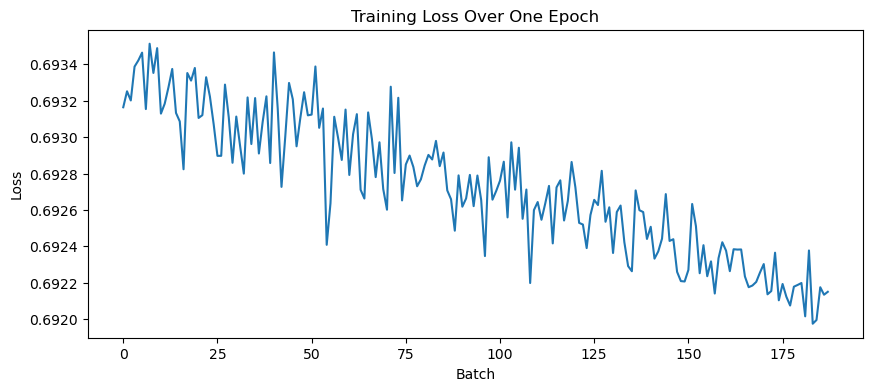

In [7]:
def train_one_epoch(model, trainloader, lr=0.001):
    criterion = nn.BCELoss()
    losses = []
    
    for i, (inputs, labels) in enumerate(trainloader):
        # Prepare data
        inputs = inputs.view(-1, 784)
        labels = (labels == 9).float().view(-1, 1)
        
        # Forward pass
        outputs = model.forward(inputs)

        loss = criterion(outputs, labels)
        losses.append(loss.item())
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()
                
        if i % 50 == 0:
            print(f'Batch {i}, Loss: {loss.item():.4f}')
    
    # Plot loss curve
    plt.figure(figsize=(10, 4))
    plt.plot(losses)
    plt.title('Training Loss Over One Epoch')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()
    
trainloader, testloader = load_binary_fashion_mnist()
model = MLPFromScratch()
train_one_epoch(model, trainloader)

### NN from Scratch Tested with Multiple Epochs

/tmp/ipykernel_3440/2862402295.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_idx = np.where((np.array(trainset.targets) == 0) | (np.array(trainset.targets) == 9))[0]
/tmp/ipykernel_3440/2862402295.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_idx = np.where((np.array(testset.targets) == 0) | (np.array(testset.targets) == 9))[0]



Epoch 1/10
--------------------------------------------------
Batch 0, Loss: 0.6932
Batch 50, Loss: 0.6930
Batch 100, Loss: 0.6925
Batch 150, Loss: 0.6923
Epoch 1 completed:
  Final Training Loss: 0.6918
  Test Accuracy: 96.50%
  Total batches in epoch: 188

Epoch 2/10
--------------------------------------------------
Batch 0, Loss: 0.6919
Batch 50, Loss: 0.6916
Batch 100, Loss: 0.6911
Batch 150, Loss: 0.6905
Epoch 2 completed:
  Final Training Loss: 0.6902
  Test Accuracy: 97.95%
  Total batches in epoch: 188

Epoch 3/10
--------------------------------------------------
Batch 0, Loss: 0.6903
Batch 50, Loss: 0.6901
Batch 100, Loss: 0.6891
Batch 150, Loss: 0.6888
Epoch 3 completed:
  Final Training Loss: 0.6888
  Test Accuracy: 97.85%
  Total batches in epoch: 188

Epoch 4/10
--------------------------------------------------
Batch 0, Loss: 0.6881
Batch 50, Loss: 0.6876
Batch 100, Loss: 0.6874
Batch 150, Loss: 0.6861
Epoch 4 completed:
  Final Training Loss: 0.6853
  Test Accuracy: 9

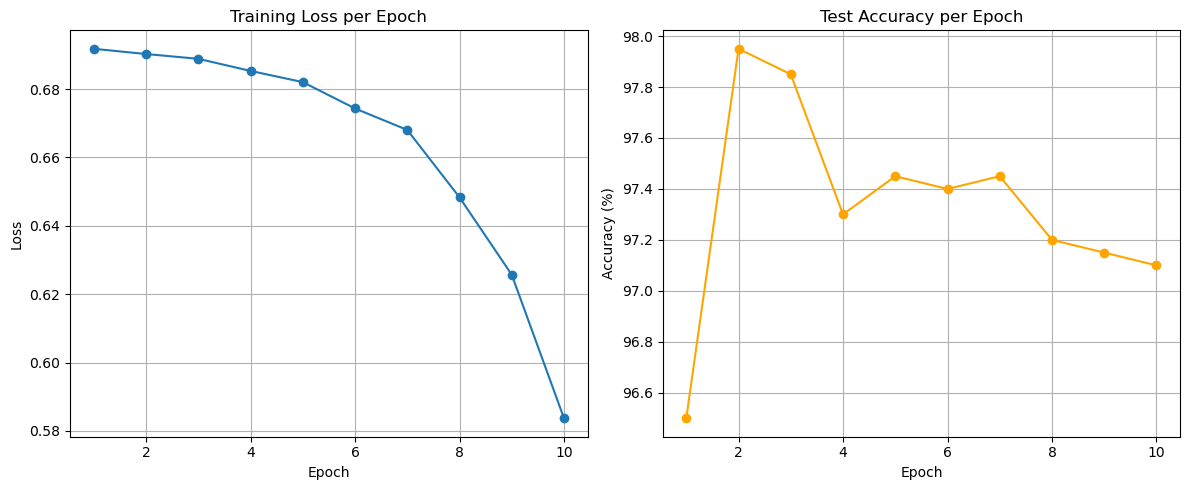


Final Results:
Final Training Loss: 0.5837
Final Test Accuracy: 97.10%


In [8]:
def train_model(model, trainloader, testloader, num_epochs=10, lr=0.001):
    """Train the model for multiple epochs with test accuracy tracking"""
    criterion = nn.BCELoss()
    train_losses = []  # Training loss per epoch (sum of batch losses)
    test_accuracies = []  # Accuracy per epoch
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 50)
        
        epoch_loss = []  # Total loss for this epoch
        batch_count = 0
        
        # Training phase
        for i, (inputs, labels) in enumerate(trainloader):
            # Prepare data
            inputs = inputs.view(-1, 784)
            labels = (labels == 9).float().view(-1, 1)
            
            # Forward pass
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            epoch_loss += [loss.item()]
            
            # Backward pass
            loss.backward()
            
            # Update parameters
            with torch.no_grad():
                for param in model.parameters():
                    param -= lr * param.grad
                    param.grad.zero_()
            
            batch_count += 1
            if i % 50 == 0:
                print(f'Batch {i}, Loss: {loss.item():.4f}')
        
        # Store total epoch loss (not average)
        train_losses.append(epoch_loss[-1])
        
        # Evaluation phase
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs = inputs.view(-1, 784)
                labels = (labels == 9).float().view(-1, 1)
                
                outputs = model.forward(inputs)
                predictions = (outputs > 0.5).float()
                
                correct += (predictions == labels).sum().item()
                total += labels.size(0)
        
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        
        print(f'Epoch {epoch+1} completed:')
        print(f'  Final Training Loss: {epoch_loss[-1]:.4f}')
        print(f'  Test Accuracy: {accuracy:.2f}%')
        print(f'  Total batches in epoch: {batch_count}')
    
    # Plot training curves - ONLY epoch-level plots
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Training loss per epoch
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, 'o-')
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    
    # Plot 2: Test accuracy per epoch
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), test_accuracies, 'o-', color='orange')
    plt.title('Test Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return train_losses, test_accuracies

# Main training execution
trainloader, testloader = load_binary_fashion_mnist()
model = MLPFromScratch()

# Train for multiple epochs with test evaluation
train_losses, test_accuracies = train_model(
    model, trainloader, testloader, num_epochs=10, lr=0.001
)

# Print final results
print(f'\nFinal Results:')
print(f'Final Training Loss: {train_losses[-1]:.4f}')
print(f'Final Test Accuracy: {test_accuracies[-1]:.2f}%')

## Part 3: PyTorch nn Module Implementation

After implementing a network from scratch, you'll use PyTorch's nn module to build the same architecture. You will need to understand:

* How to use nn.Module and nn.Sequential
* The benefits of PyTorch's built-in layers
* Proper weight initialization techniques

Please fill out the code marked with `TODO` in the following cell. The network structure is the same as the previous one.

In [9]:
class MLPWithNN(nn.Module):
    def __init__(self, input_size=784):
        super(MLPWithNN, self).__init__()
        # TODO: Implement the same architecture using nn.Sequential and nn.Linear
        # Hint: Remember to include activation functions
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),  # Input (784) -> Linear (512)
            nn.ReLU(),                   # ReLU activation
            nn.Linear(512, 128),         # Linear (128)
            nn.ReLU(),                   # ReLU activation  
            nn.Linear(128, 1),           # Linear (1)
            nn.Sigmoid()                 # Sigmoid activation
        )
    
    def forward(self, x):
        return self.network(x.view(-1, 784))

# Parameter Initialization Function
def init_weights(m):
    if isinstance(m, nn.Linear):
        # TODO: Initialize the weights with normal distribution (mean=0, std=0.01)
        # and biases with zeros
        nn.init.normal_(m.weight, mean=0.0, std=.01)
        nn.init.zeros_(m.bias)
        pass

Now, you will need to create a complete training pipeline that includes:

* Multiple training epochs
* Progress monitoring
* Model evaluation
* Performance visualization

This section brings together everything you've learned to create a professional-quality training setup. Pleae fill out the code marked with `TODO` in the following cell. You may find ideas of what are needed from the above `train_one_epoch` function.

In [10]:
def train_model(model, trainloader, testloader, epochs=10, lr=0.001):
    # TODO: Define the criterion.
    criterion = nn.BCELoss()# Your code here
    # TODO: Define the optimizer. We can use the Adam optimizer here.
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)# Your code here
    
    train_losses = []
    test_accuracies = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, labels in trainloader:
            inputs = inputs.view(-1, 784)
            labels = (labels == 9).float().view(-1, 1)
            
            # TODO: Implement the training step
            # 1. Zero the gradients
            optimizer.zero_grad()
            # 2. Forward pass
            outputs = model.forward(inputs)
            # 3. Compute loss
            loss = criterion(outputs, labels)
            # print(loss)
            # 4. Backward pass
            loss.backward()
            # 5. Update parameters
            optimizer.step()
            # Your code here
            
            running_loss += loss.item()
            
        # Evaluate on test set after training for one epoch.
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs = inputs.view(-1, 784)
                labels = (labels == 9).float().view(-1, 1)
                outputs = model(inputs)

                # TODO: What is the prediction from the network? The output is a float between 0 andd 1, if it is 0 it represents one label and if it is 1 it represents the other label
                predictions = outputs.round()# Your code here
                correct += (predictions == labels).sum().item()
                total += labels.size(0)
        
        # TODO: Calculate the accuracy.
        test_accuracy = correct/total * 100 # Your code here
        test_accuracies.append(test_accuracy)
        train_losses.append(running_loss / len(trainloader))
        
        print(f'Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {test_accuracy:.2f}%')
    
    # Plot training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.show()

In [11]:
for inputs, labels in trainloader:
    inputs = inputs.view(-1, 784)
    labels = (labels == 9).float().view(-1, 1)

Run the following cell to complete training for 10 epochs with visualization of loss changes and test accuracy changes. Due to the limited data, it is natural to see the accuracy is already high at early epoch.

/tmp/ipykernel_3440/2862402295.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_idx = np.where((np.array(trainset.targets) == 0) | (np.array(trainset.targets) == 9))[0]
/tmp/ipykernel_3440/2862402295.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_idx = np.where((np.array(testset.targets) == 0) | (np.array(testset.targets) == 9))[0]


Epoch 1, Loss: 0.6932, Test Accuracy: 52.25%
Epoch 2, Loss: 0.6920, Test Accuracy: 91.95%
Epoch 3, Loss: 0.6907, Test Accuracy: 98.30%
Epoch 4, Loss: 0.6891, Test Accuracy: 99.15%
Epoch 5, Loss: 0.6870, Test Accuracy: 99.25%
Epoch 6, Loss: 0.6840, Test Accuracy: 99.40%
Epoch 7, Loss: 0.6797, Test Accuracy: 99.45%
Epoch 8, Loss: 0.6731, Test Accuracy: 99.45%
Epoch 9, Loss: 0.6629, Test Accuracy: 99.40%
Epoch 10, Loss: 0.6465, Test Accuracy: 99.40%


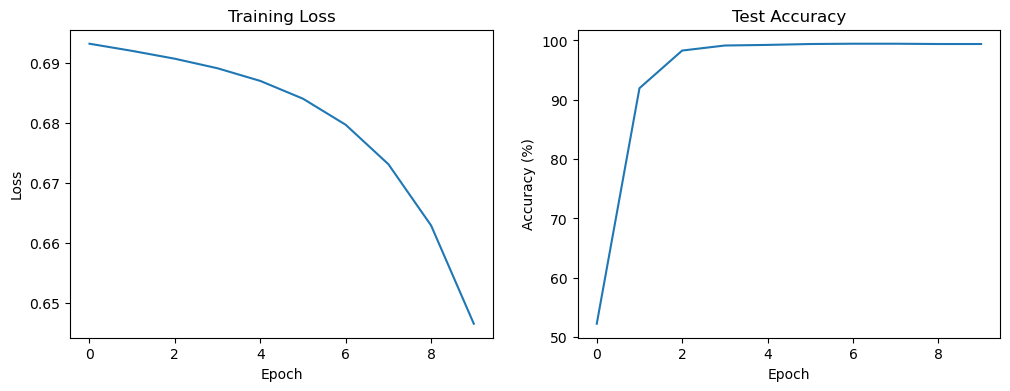

In [14]:
# Load data
trainloader, testloader = load_binary_fashion_mnist()

# Create and initialize model
model = MLPWithNN()
model.apply(init_weights)

# Train model
train_model(model, trainloader, testloader, epochs=10)

### Testing different learning rates

learning rate: 0.0001
Epoch 1, Loss: 0.6926, Test Accuracy: 54.90%
Epoch 2, Loss: 0.6925, Test Accuracy: 57.10%
Epoch 3, Loss: 0.6923, Test Accuracy: 60.70%
Epoch 4, Loss: 0.6922, Test Accuracy: 65.50%
Epoch 5, Loss: 0.6920, Test Accuracy: 70.00%
Epoch 6, Loss: 0.6919, Test Accuracy: 75.00%
Epoch 7, Loss: 0.6917, Test Accuracy: 78.65%
Epoch 8, Loss: 0.6916, Test Accuracy: 81.65%
Epoch 9, Loss: 0.6914, Test Accuracy: 84.60%
Epoch 10, Loss: 0.6913, Test Accuracy: 86.25%


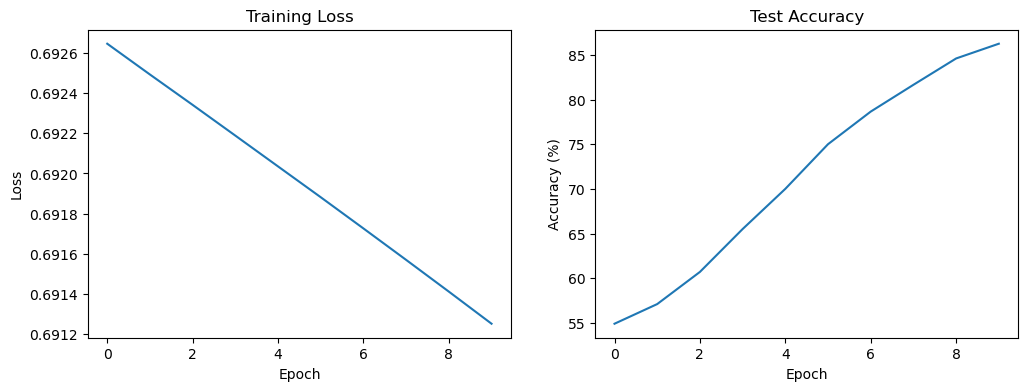

learning rate: 0.001
Epoch 1, Loss: 0.6928, Test Accuracy: 51.70%
Epoch 2, Loss: 0.6912, Test Accuracy: 88.05%
Epoch 3, Loss: 0.6893, Test Accuracy: 97.65%
Epoch 4, Loss: 0.6866, Test Accuracy: 98.75%
Epoch 5, Loss: 0.6829, Test Accuracy: 98.90%
Epoch 6, Loss: 0.6776, Test Accuracy: 98.95%
Epoch 7, Loss: 0.6695, Test Accuracy: 98.95%
Epoch 8, Loss: 0.6569, Test Accuracy: 98.90%
Epoch 9, Loss: 0.6364, Test Accuracy: 98.90%
Epoch 10, Loss: 0.6024, Test Accuracy: 99.00%


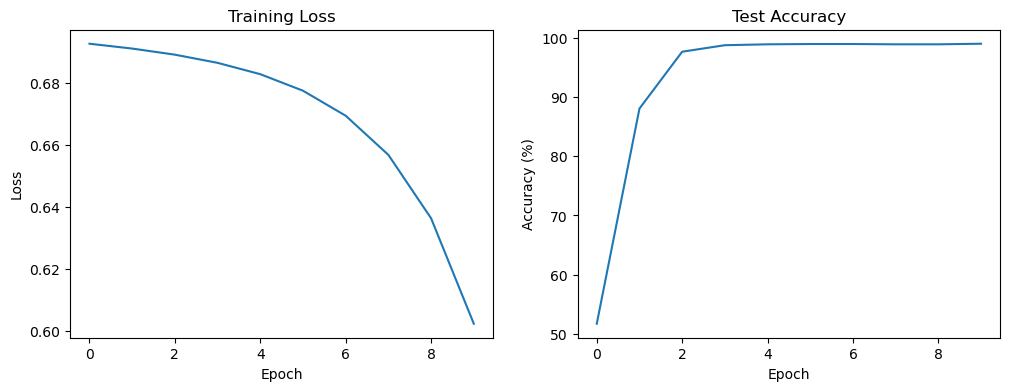

learning rate: 0.01
Epoch 1, Loss: 0.6699, Test Accuracy: 97.50%
Epoch 2, Loss: 0.2244, Test Accuracy: 99.45%
Epoch 3, Loss: 0.0254, Test Accuracy: 99.65%
Epoch 4, Loss: 0.0144, Test Accuracy: 99.70%
Epoch 5, Loss: 0.0108, Test Accuracy: 99.75%
Epoch 6, Loss: 0.0091, Test Accuracy: 99.85%
Epoch 7, Loss: 0.0078, Test Accuracy: 99.85%
Epoch 8, Loss: 0.0067, Test Accuracy: 99.90%
Epoch 9, Loss: 0.0060, Test Accuracy: 99.90%
Epoch 10, Loss: 0.0055, Test Accuracy: 99.90%


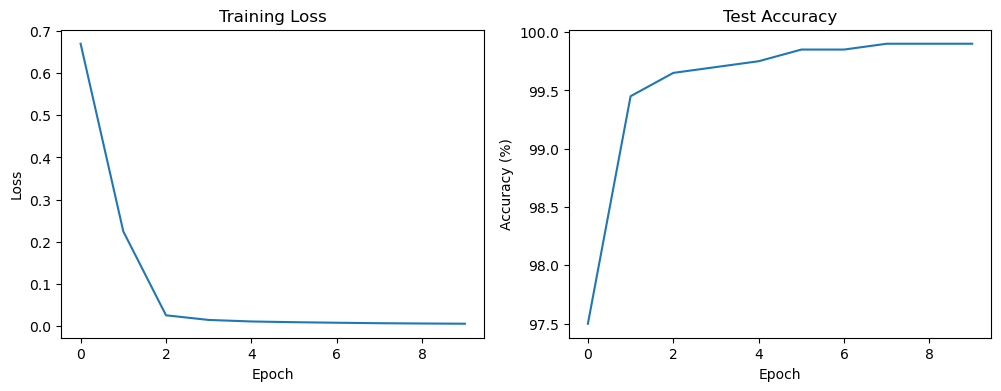

learning rate: 0.1
Epoch 1, Loss: 0.1019, Test Accuracy: 99.90%
Epoch 2, Loss: 0.0042, Test Accuracy: 99.90%
Epoch 3, Loss: 0.0027, Test Accuracy: 99.95%
Epoch 4, Loss: 0.0021, Test Accuracy: 99.95%
Epoch 5, Loss: 0.0017, Test Accuracy: 99.95%
Epoch 6, Loss: 0.0013, Test Accuracy: 99.95%
Epoch 7, Loss: 0.0012, Test Accuracy: 99.95%
Epoch 8, Loss: 0.0009, Test Accuracy: 99.95%
Epoch 9, Loss: 0.0009, Test Accuracy: 99.95%
Epoch 10, Loss: 0.0008, Test Accuracy: 99.95%


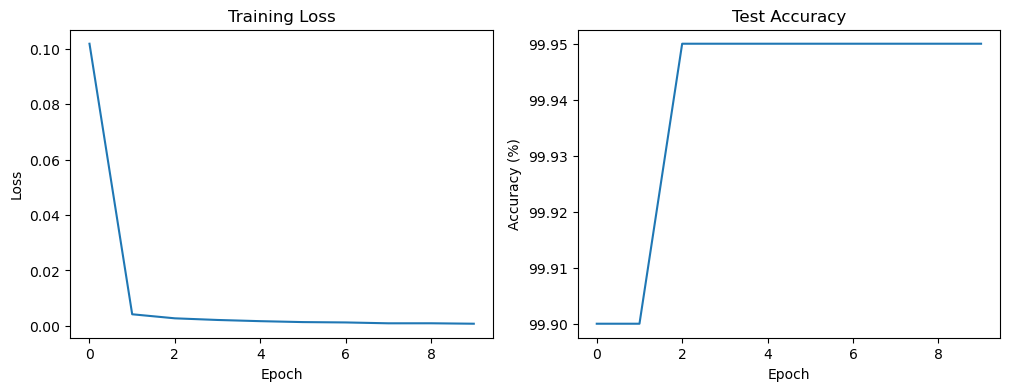

learning rate: 1.0
Epoch 1, Loss: 0.0754, Test Accuracy: 99.90%
Epoch 2, Loss: 0.0026, Test Accuracy: 99.95%
Epoch 3, Loss: 0.0018, Test Accuracy: 99.95%
Epoch 4, Loss: 0.0013, Test Accuracy: 99.95%
Epoch 5, Loss: 0.0012, Test Accuracy: 99.95%
Epoch 6, Loss: 0.0007, Test Accuracy: 99.95%
Epoch 7, Loss: 0.0002, Test Accuracy: 99.95%
Epoch 8, Loss: 0.0001, Test Accuracy: 99.95%
Epoch 9, Loss: 0.0000, Test Accuracy: 99.95%
Epoch 10, Loss: 0.0000, Test Accuracy: 99.95%


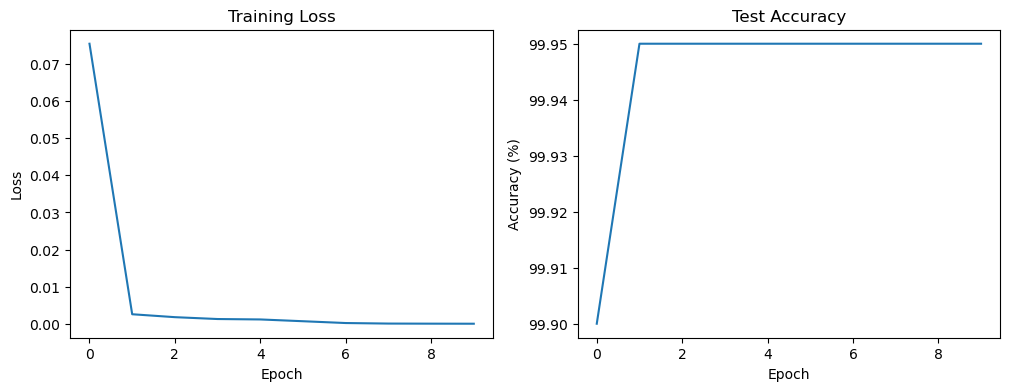

learning rate: 1.2
Epoch 1, Loss: 26.1547, Test Accuracy: 50.00%
Epoch 2, Loss: 49.9917, Test Accuracy: 50.00%
Epoch 3, Loss: 49.9917, Test Accuracy: 50.00%
Epoch 4, Loss: 49.9751, Test Accuracy: 50.00%
Epoch 5, Loss: 49.9917, Test Accuracy: 50.00%
Epoch 6, Loss: 50.0083, Test Accuracy: 50.00%
Epoch 7, Loss: 50.0083, Test Accuracy: 50.00%
Epoch 8, Loss: 50.0000, Test Accuracy: 50.00%
Epoch 9, Loss: 49.9917, Test Accuracy: 50.00%
Epoch 10, Loss: 49.9917, Test Accuracy: 50.00%


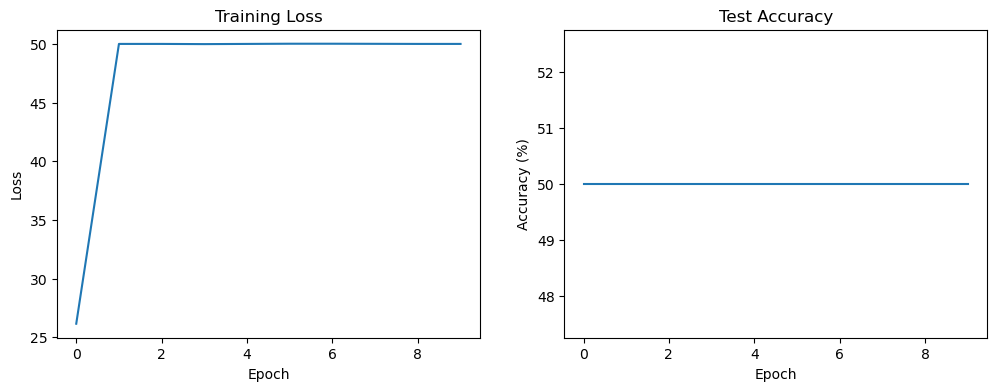

learning rate: 1.3
Epoch 1, Loss: 27.6813, Test Accuracy: 50.00%
Epoch 2, Loss: 50.0001, Test Accuracy: 50.00%
Epoch 3, Loss: 50.0249, Test Accuracy: 50.00%
Epoch 4, Loss: 49.9834, Test Accuracy: 50.00%
Epoch 5, Loss: 50.0249, Test Accuracy: 50.00%
Epoch 6, Loss: 50.0000, Test Accuracy: 50.00%
Epoch 7, Loss: 50.0166, Test Accuracy: 50.00%
Epoch 8, Loss: 49.9668, Test Accuracy: 50.00%
Epoch 9, Loss: 50.0249, Test Accuracy: 50.00%
Epoch 10, Loss: 50.0166, Test Accuracy: 50.00%


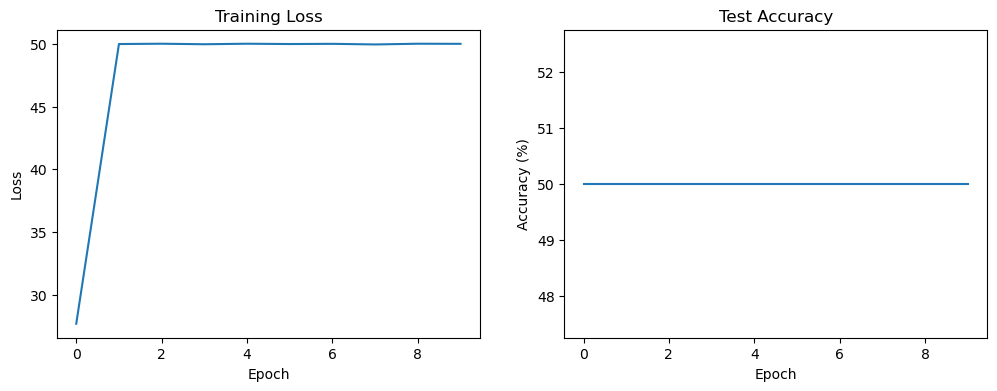

In [24]:
for lr in [1e-4,1e-3, 1e-2, 1e-1,1e0, 1.2, 1.3]:
    # Create and initialize model
    print("learning rate:", lr)
    model = MLPWithNN()
    model.apply(init_weights)
    train_model(model, trainloader, testloader, epochs=10, lr = lr)

## Part 4: Answer the following questions

Double click this cell and write your answers right after the `[Answer]` sign.

1. Q: Why do we multiply the weights by 0.01 during initialization? What happens if we don't?

[Answer]: The multiplication of weights by a factor of 0.01 during initialization serves as a critical normalization technique to ensure numerical stability and effective gradient propagation in neural networks employing sigmoid activation functions with Binary Cross Entropy (BCE) loss. With weights that are not extremely large in magnitude, we can constrain the initial predictions (1st epoch) to be clustered around 0.5 (which is the mean between the two classes/options, 0 and 1) rather than at the saturated extreme values close to 0 and 1. 

For a specific sample/prediction, the BCE loss can be written as $L = -[y\log(x) + (1-y) * \log(1-x)]$, where $y$ is the true label (0 or 1) and $x$ is the predicted probability (somewhere between 0 and 1). If we have initial predictions near 0 and 1 for $x$, before training, then, we will have extremely large loss values ($x \text{ or } 1-x \approx 0$, so $\log(x)$ or $\log(1-x)$ will approach infinity/is extremely large). Thus, the inital loss for the training is high ($\approx 60$), unless we scale the weights such that the inital predictions are closer to the mean ($0.5$), upon which the loss is $\approx 0.69$. Note that the training error, in either case, will reduce with epochs, but it takes the network with large weight initialization longer to achieve the same training error. For the testing error, as well, we notice that it takes longer for the poorly initialized network to achieve the same testing accuracy of $\approx 95%$; for the network with weights initialized with standard deviation of 1, it take $\approx 4$ epochs while for the network with weights initialized with standard deviation of 0.1, it takes $\approx 1$ epoch. 

From a gradient perspective, this initialization (with small standard deviation, and predictions near mean) maintains the denominator term $x(1-x)$ in the BCE gradient expression $∂L/∂x = (x-y)/(x(1-x))$ at approximately 0.25, preventing the explosive gradient magnitudes that occur when x approaches 0 or 1. The resulting moderate gradient values enable stable weight updates through backpropagation without risking numerical overflow or underflow. 

2. Q: What is the purpose of requires_grad_(True)? What happens if we forget it?

[Answer]: requires_grad_(True) is a method that allows for automatic gradient computation for tensors (the weights/biases) in PyTorch. When set to True, PyTorch enables backpropagation (the gradient can be calculated through .backward()) and thus, with gradient descent, the weights can be updated. Without requires_grad_(True) or with requires_grad_(False), we get the following error:"RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn". This means that when loss.backward() is called, PyTorch cannot compute the gradients. 

3. Q: Compare the training process between MLPFromScratch and MLPWithNN. What are the differences?

[Answer]:
1. Parameter Update Mechanism: The scratch implementation uses basic gradient descent (param -= lr * param.grad), whereas MLPWithNN can leverage advanced optimizers like SGD with momentum, offering better convergence properties.
2. Architecture Definition: MLPFromScratch defines layers as separate weight matrices with manual initialization, while MLPWithNN uses nn.Sequential for a more modular and readable architecture.

4. Q: Explain the role of the learning rate. What happens if it's too high or too low? Try to change it yourself and report what happened for different values.

[Answer]: The learning rate represents the step size taken during the gradient descent optimization of the weights. For a high learning rate, e.g., lr = 1.2 or above, the updates are too large, causing the optimization to overshoot the minimum/minimization area, resulting in a lack of convergence/improvement in training loss or testing accuracy. For a too low learning, e.g., lr = 1e-4, it takes many epochs to achieve a reasonable test accuracy (it takes 10 epochs to achieve a test accuracy of $\approx 77%$); theoretically, you should still achieve the optimal solution/convergence, unless there are multiple local minima in the loss function far from the optimum (upon which you would need to use momentum or a similar strategy), but training is very inefficient and requires many epochs for learning. For an optimal learning rate, between 0.001 and 0.1, we have a steady convergence, efficient training, and optimal test accuracy.  

5. Q: What errors or challenges did you encounter? How did you diagnose and solve these issues? What insights did you gain in this process? This is an open-ended question.

[Answer]:
1. Initially, I was confused why a small difference in the predictions ($0/1$ for weights initialized with standard devation of 1 vs $~0.5$ for weights initialized with standard deviation of 0.01) was leading to such large training errors ($>50$ vs. $~0.69$). After analyzing the BCEloss function (from the pytorch documentation: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), I realized that this loss function included logarthimic functions, which would cause it to be highly sensitive to incorrect predictions.
2. For the learning rate comparision, I was expecting a high learning rate to be $\approx 1e-2$; generally in my research projects/other ML networks, a learning rate about $1e-2$ causes the networks to not learn well. However, for this specific problem, after trying a few more learning rates, I was finally able to realize that the acceptable learning rate range is much larger. This is perhaps because the loss function is not extremely complicated with multiple local minima/saddle points (as is the case in my other projects). I understood that an optimal learning rate is highly context-dependent - simpler architectures and loss landscapes can accommodate more aggressive optimization. 
3. I initally misread the instructions and did not use a sigmoid function for the last layer of the network (used a ReLU) in MLPFromScratch. As a result, my predicted values were not between 0 and 1, causing me much confusion on what the model was predicting. After implementing the second network and comparing the architecture with my first model, I realized my error.  



